## **Data Exploratory Step:**

### **Bivariate Analysis:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as ajt
import ast

In [3]:
df = pd.read_csv("D:\\IT Courses\\Data Analysis Courses\\Data Club Courses\\Supermarket Sales Analysis Project\\Supermarkets_Sales Analysis_Project\\Data\\cleaned_supermarket_sales.csv")

df["date_time"] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date_time                1000 non-null   datetime64[ns]
 11  payment                  1000 non-null   object        
 12  cogs                     1000 non-null  

### **Analysis The Gender Distribution In Each Branch:**

In [4]:
gender_branch_group = df.groupby(by=["branch", "gender"]).agg(
    gender_count=("gender", "size")
)
gender_branch_group

gender_count
branch gender              
A      Female           161
       Male             179
B      Female           162
       Male             170
C      Female           178
       Male             150

In [5]:
gender_branch_pivot = gender_branch_group.pivot_table(
    index="branch",
    columns="gender",
    values="gender_count"
)

gender_branch_pivot

gender,Female,Male
branch,,
A,161.0,179.0
B,162.0,170.0
C,178.0,150.0


**Using Plot() Pandas Function:**

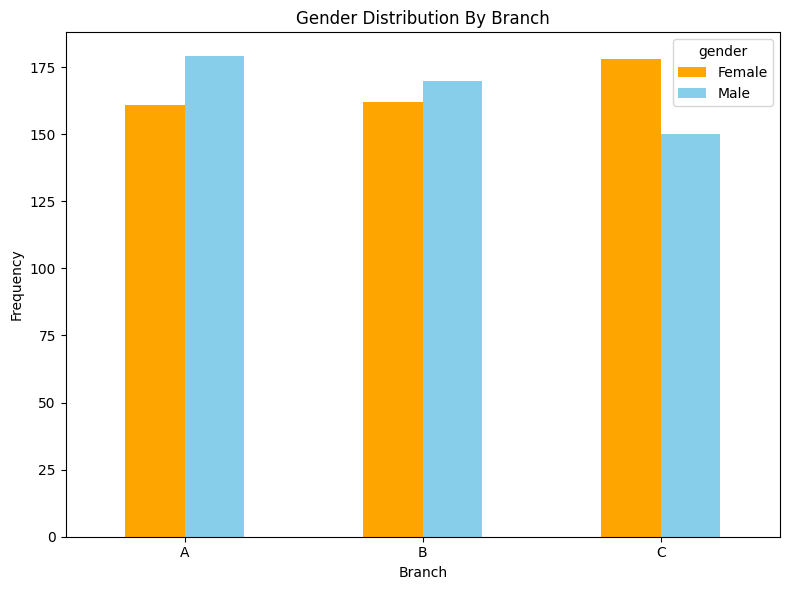

In [6]:
gender_branch_pivot.plot(
    kind='bar',
    figsize=(8,6),
    color=["orange", "skyblue"]
)
plt.title("Gender Distribution By Branch")
plt.xlabel("Branch")
plt.xticks(rotation=0)
plt.ylabel("Frequency")
plt.tight_layout()

**Using Matplotlib Library:**

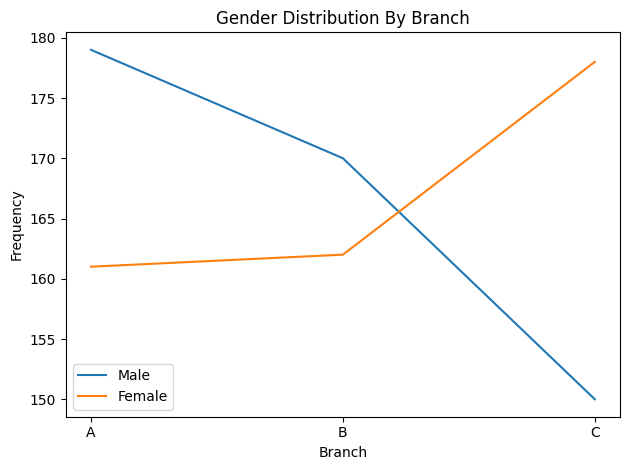

In [7]:
for column in (gender_branch_pivot.columns.sort_values(ascending=False)):
    plt.plot(
        gender_branch_pivot.index,
        gender_branch_pivot[column],
        label=column,
    )
    plt.legend(loc='best')
    plt.title("Gender Distribution By Branch")
    plt.xlabel("Branch")
    plt.ylabel("Frequency")
    plt.tight_layout()

**`Chart Analysis:`**

- `Male` (blue) gender is more than `female` (orange) gender in branch (`A`,`B`), expect branch (`c`), in which `female` (orange) gender is more than `male` (blue) gender.


### **Relation Betweem Summation Of Total In All Branchs (A,B,C) Over Date Using Line Chart:**

In [ ]:
df_copy = df.copy()

date_branch_total_df = df_copy[["branch", "date_time", "total"]]

date_branch_total_df["date"] = date_branch_total_df["date_time"].dt.date

date_branch_total_df.head()

In [9]:
date_branch_total_group = date_branch_total_df.groupby(by=["date", "branch"]).agg(
    total_sum=("total","sum")
).round(2)
date_branch_total_group 

total_sum
date       branch           
2019-01-01 A         2371.32
           B         1536.70
           C          837.16
2019-01-02 A          307.05
           B         1162.80
...                      ...
2019-03-29 B         2059.93
           C          985.70
2019-03-30 A         1320.62
           B         1724.46
           C         1441.99

[263 rows x 1 columns]

In [10]:
date_branch_total_pivot = date_branch_total_group.pivot_table(
    index="date",
    columns="branch",
    values="total_sum"
)
date_branch_total_pivot

branch,A,B,C
date,,,
2019-01-01,2371.32,1536.70,837.16
2019-01-02,307.05,1162.80,475.65
2019-01-03,937.41,1016.69,124.03
2019-01-04,483.26,510.58,629.84
2019-01-05,2024.50,486.76,1025.42
...,...,...,...
2019-03-26,1187.34,301.20,473.97
2019-03-27,1060.63,898.89,943.30
2019-03-28,1652.93,95.67,480.81


### **Using Pandas Library:**

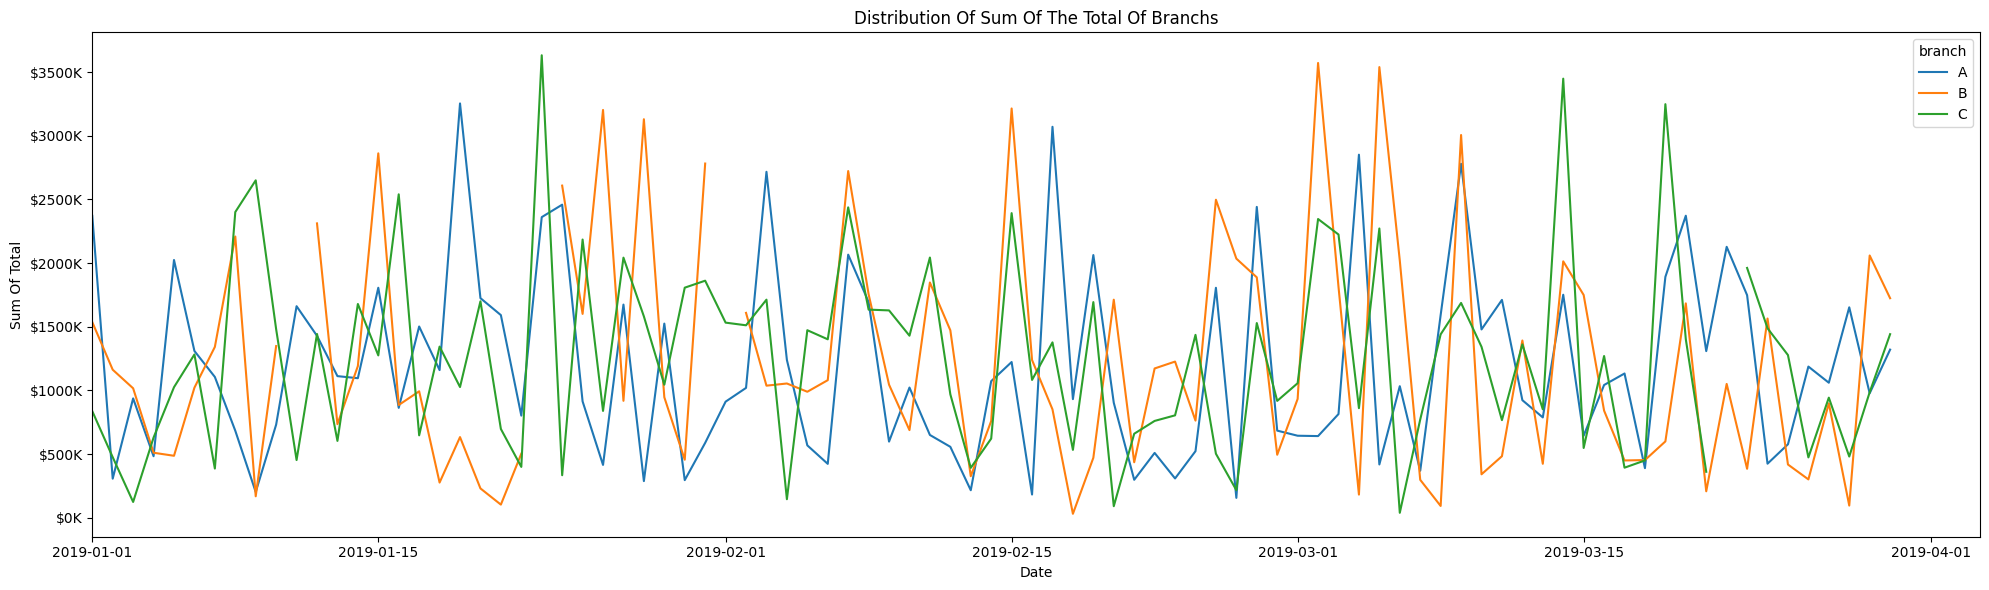

In [11]:
date_branch_total_pivot.plot(
    kind='line',
    figsize=(20,6)
)
plt.title("Distribution Of Sum Of The Total Of Branchs")
plt.xlabel("Date")
plt.ylabel("Sum Of Total")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: (f"${int(y)}K")))
plt.xlim(left=date_branch_total_pivot.index.min()) 
plt.tight_layout()

### **Using Matplotlib Library:**

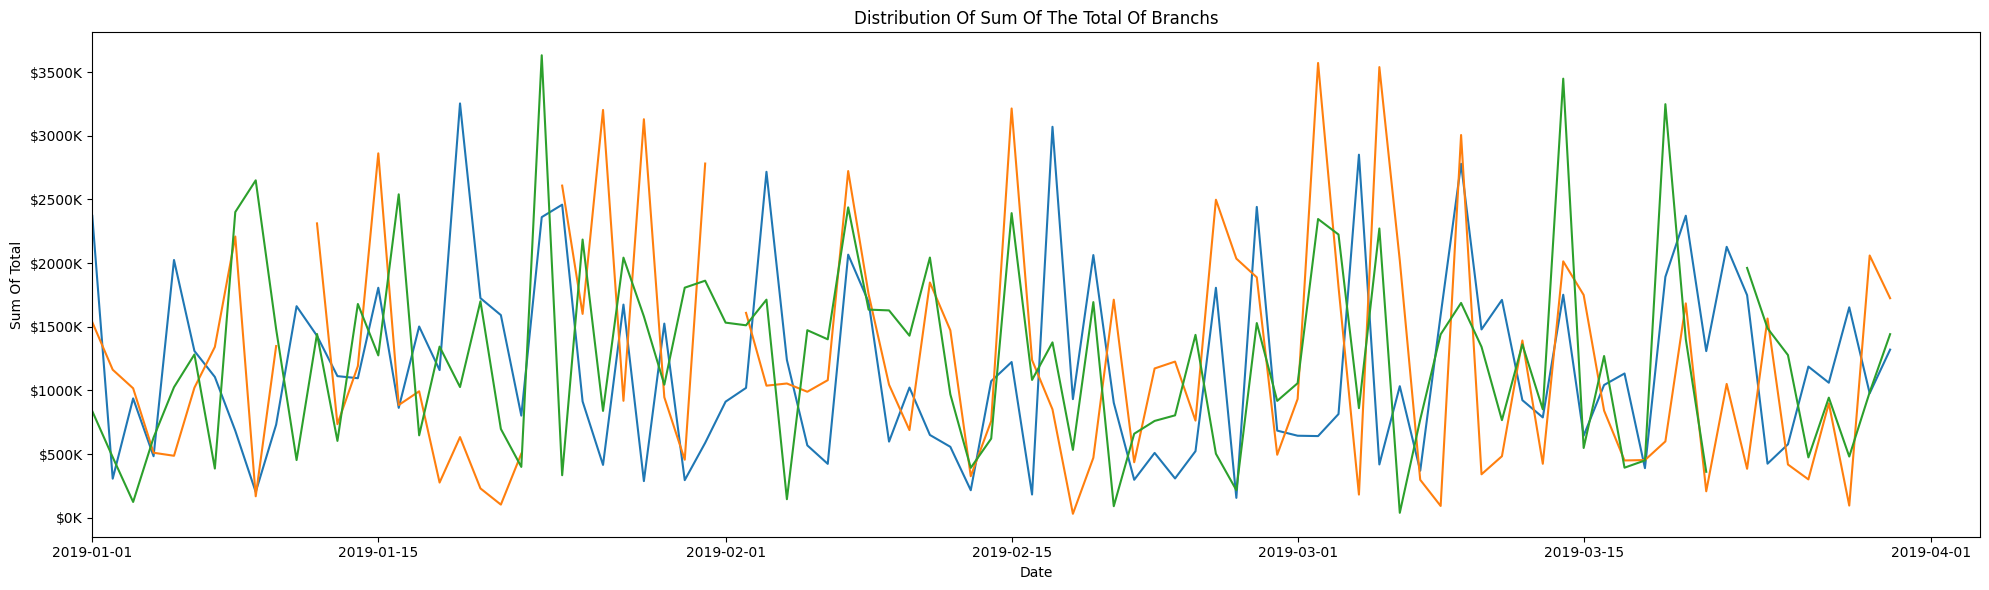

In [12]:
plt.figure(figsize=(20,6))
for column in date_branch_total_pivot.columns:
    plt.plot(
        date_branch_total_pivot.index,
        date_branch_total_pivot[column],
        label=[column]
    )
plt.title("Distribution Of Sum Of The Total Of Branchs")
plt.xlabel("Date")
plt.ylabel("Sum Of Total")
plt.xlim(left=date_branch_total_pivot.index.min())
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: (f"${int(y)}K")))
plt.tight_layout()

**Using Plotly Library:**

In [13]:
px.line(
    date_branch_total_pivot,
    color="branch",
    labels={
        "date":"Date",
        "value":"Sum Of Total In (USD$) "
    },
    title="Distribution Of Sum Of The Total Of Branchs"
)

**We need to observe the highest branch in `summation of total`, so we need to do a `normalization` to make all branchs lines start from same point to easily and clearly comparring between thems, to do this we will divide the total of eash column by day one (`first row`)**

In [14]:
date_branch_total_pivot

branch,A,B,C
date,,,
2019-01-01,2371.32,1536.70,837.16
2019-01-02,307.05,1162.80,475.65
2019-01-03,937.41,1016.69,124.03
2019-01-04,483.26,510.58,629.84
2019-01-05,2024.50,486.76,1025.42
...,...,...,...
2019-03-26,1187.34,301.20,473.97
2019-03-27,1060.63,898.89,943.30
2019-03-28,1652.93,95.67,480.81


In [15]:
date_branch_total_pivot_normalized = date_branch_total_pivot / date_branch_total_pivot.iloc[0, :]
date_branch_total_pivot_normalized.round(2)

branch,A,B,C
date,,,
2019-01-01,1.00,1.00,1.00
2019-01-02,0.13,0.76,0.57
2019-01-03,0.40,0.66,0.15
2019-01-04,0.20,0.33,0.75
2019-01-05,0.85,0.32,1.22
...,...,...,...
2019-03-26,0.50,0.20,0.57
2019-03-27,0.45,0.58,1.13
2019-03-28,0.70,0.06,0.57


**Using Plot() Pandas Library For Plotting Normalized Data:**

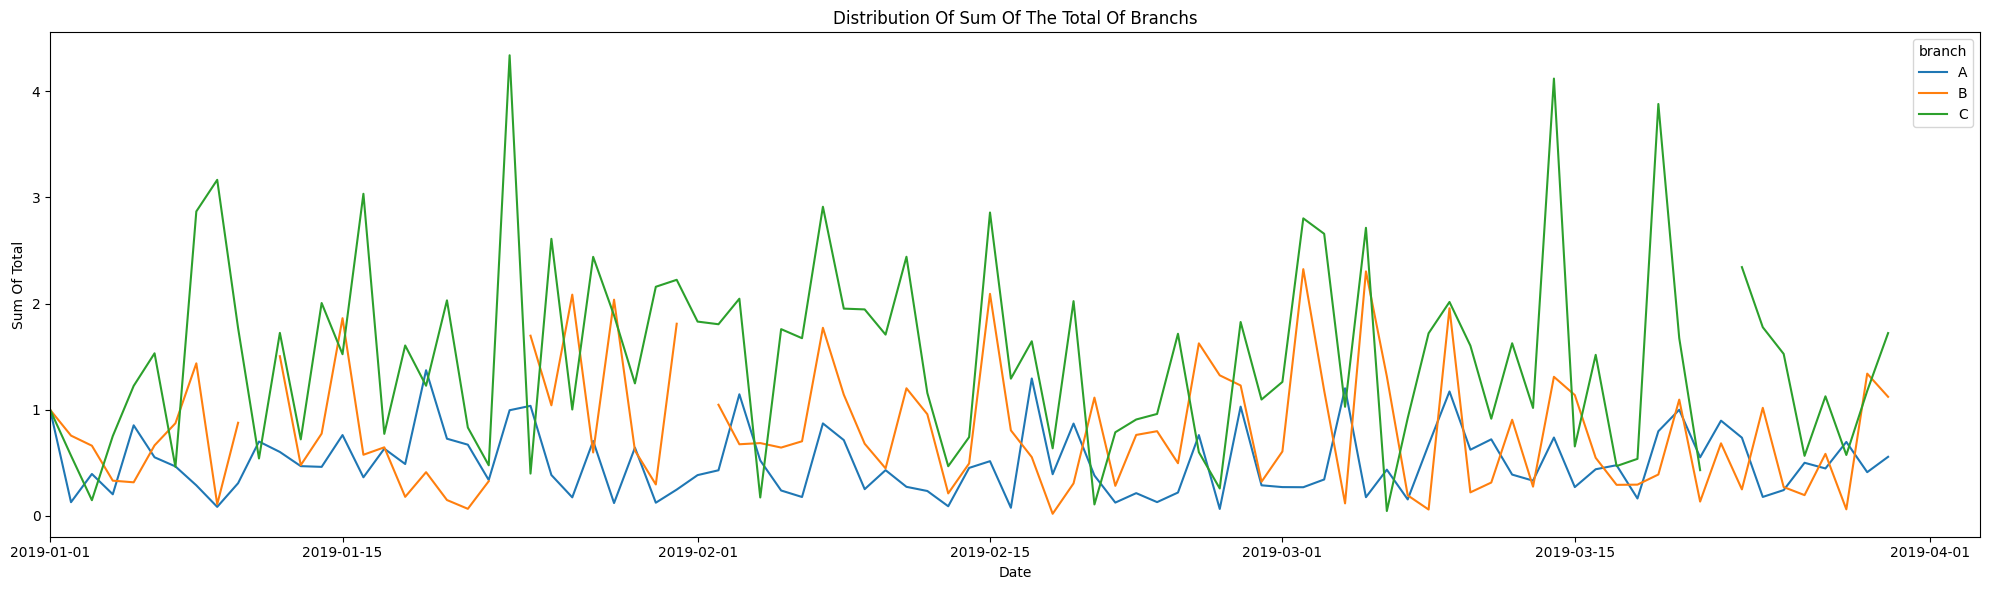

In [16]:
date_branch_total_pivot_normalized.plot(
    kind='line',
    figsize=(20,6)
)
plt.title("Distribution Of Sum Of The Total Of Branchs")
plt.xlabel("Date")
plt.ylabel("Sum Of Total")
plt.xlim(left=date_branch_total_pivot_normalized.index.min())
plt.tight_layout()

**Using Matplotlib Library For Plotting Normalized Data:**

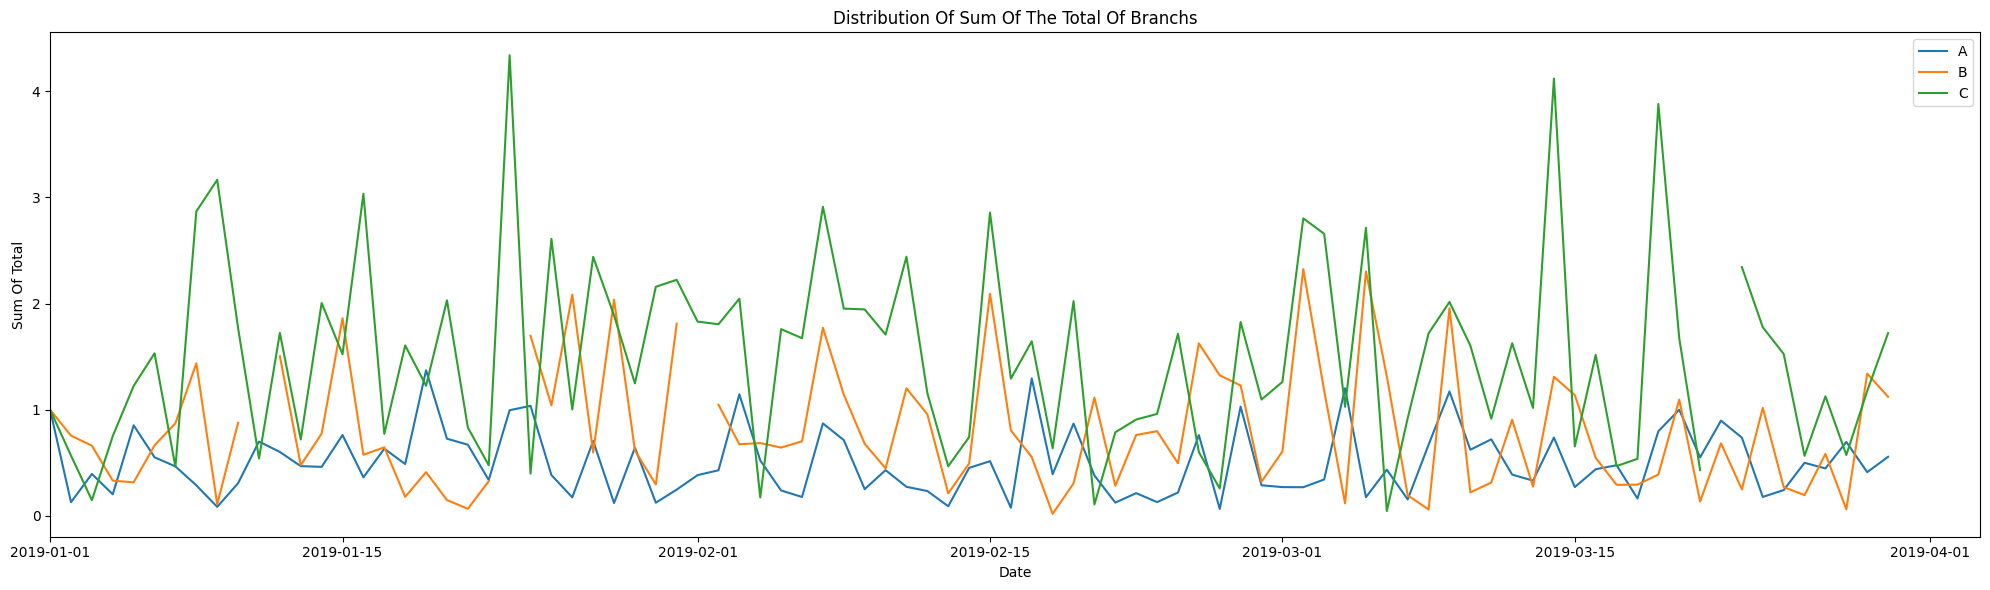

In [17]:
plt.figure(figsize=(20,6))
for column in date_branch_total_pivot_normalized.columns:
    plt.plot(
        date_branch_total_pivot_normalized.index,
        date_branch_total_pivot_normalized[column],
        label=column
    )
plt.title("Distribution Of Sum Of The Total Of Branchs")
plt.xlabel("Date")
plt.ylabel("Sum Of Total")
plt.xlim(left=date_branch_total_pivot_normalized.index.min())
plt.legend()
plt.tight_layout()

**Using Plotly Library:**

In [18]:
px.line(
    date_branch_total_pivot_normalized,
    labels={
        "date":"Date",
        "value":"Sum Of Total"
    },
    title="Distribution Of Sum Of The Total Of Branchs",
    color='branch'
)

**`Chart Analysis:`**

- In the provided chart, the green line (Branch C) consistently appears at the highest level, indicating that Branch C has the highest sum of totals among the three branches throughout the observed period.

- The orange line (Branch B) is generally positioned below Branch C, suggesting a lower sum of totals for Branch B.

- Finally, the blue line (Branch A) is the lowest, indicating the lowest sum of totals among the three branches.

### **Relation Betweem Summation Of Total In All Branchs (A,B,C) Over Date Using Pie Chart:**

In [19]:
branch_total_group = df_copy.groupby(by=["branch"], as_index=False).agg(
    sum_total=("total","sum")
).round(2)
branch_total_group

,branch,sum_total
0,A,106200.37
1,B,106197.67
2,C,110568.71


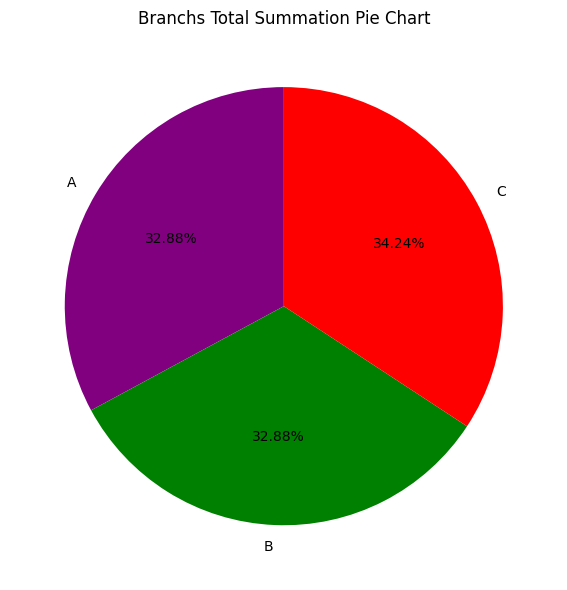

In [20]:
branchs = branch_total_group["branch"]
sum_totals = branch_total_group["sum_total"]

plt.figure(figsize=(6,6))
plt.pie(
    sum_totals,
    labels=branchs,
    startangle=90,
    autopct='%1.2f%%',
    colors=["purple", "green", "red"]
)
plt.title("Branchs Total Summation Pie Chart")
plt.tight_layout()

**`Chart Analysis:`**

1. The chart shows an unequal distribution among the three branches (A, B, and C). branch C has the largest share, followed by A and B. 
2. Branche C holds a slight majority with 34.24% of the total. 
3. Branches A and B have almost identical shares, both at 32.88%.
4. This indicates that branch C has the largest market share, while branches A and B have smaller but nearly equal shares, and in performance metrics branch C performs best, followed by A and B.